## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [19]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [6]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type = "snake")
)

## Procesar los datos de NHANES

In [30]:
# Assign to nhanes_df the result of the following operations:
nhanes_df =(
    # Start with the raw DataFrame
    nhanes_raw_df
    # Select only the columns of interest
    .select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    # Rename the columns for easier understanding
    .rename_columns(
        {
            "age_in_years_at_screening": "age",
            "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes": "diabetes",
            "60_sec_pulse30_sec_pulse2":"pulse",
            "total_cholesterol_mgdl":"total_colesterol"
        }
    )
    # Replace certain values in the height, weight, and diabetes columns with NaN
    .replace(
        {
            "height":{
                9999: np.nan,
                7777: np.nan
            },
            "weight":{
                9999: np.nan,
                7777: np.nan
            },
            "diabetes":{
                "Borderline": np.nan
            }
        }
    )
    # Sort the variables by the amount of missingness
    .missing.sort_variables_by_missingness()
    # Drop any rows where the diabetes column is NaN
    .dropna(
        subset = ["diabetes"],
        how="any"
    )
    # Transform the diabetes column to integer type
    .transform_column(
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise= False
        )
)

nhanes_df

/home/alphalejo/anaconda3/envs/missing_values/lib/python3.11/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,height,weight,general_health_condition,total_colesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,Female,2.0
93704.0,NaN,NaN,NaN,NaN,NaN,0,Male,2.0
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,NaN,NaN,Good,189.0,100.0,0,Male,13.0
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,Male,4.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


## Visualizar los valores faltantes

<Axes: >

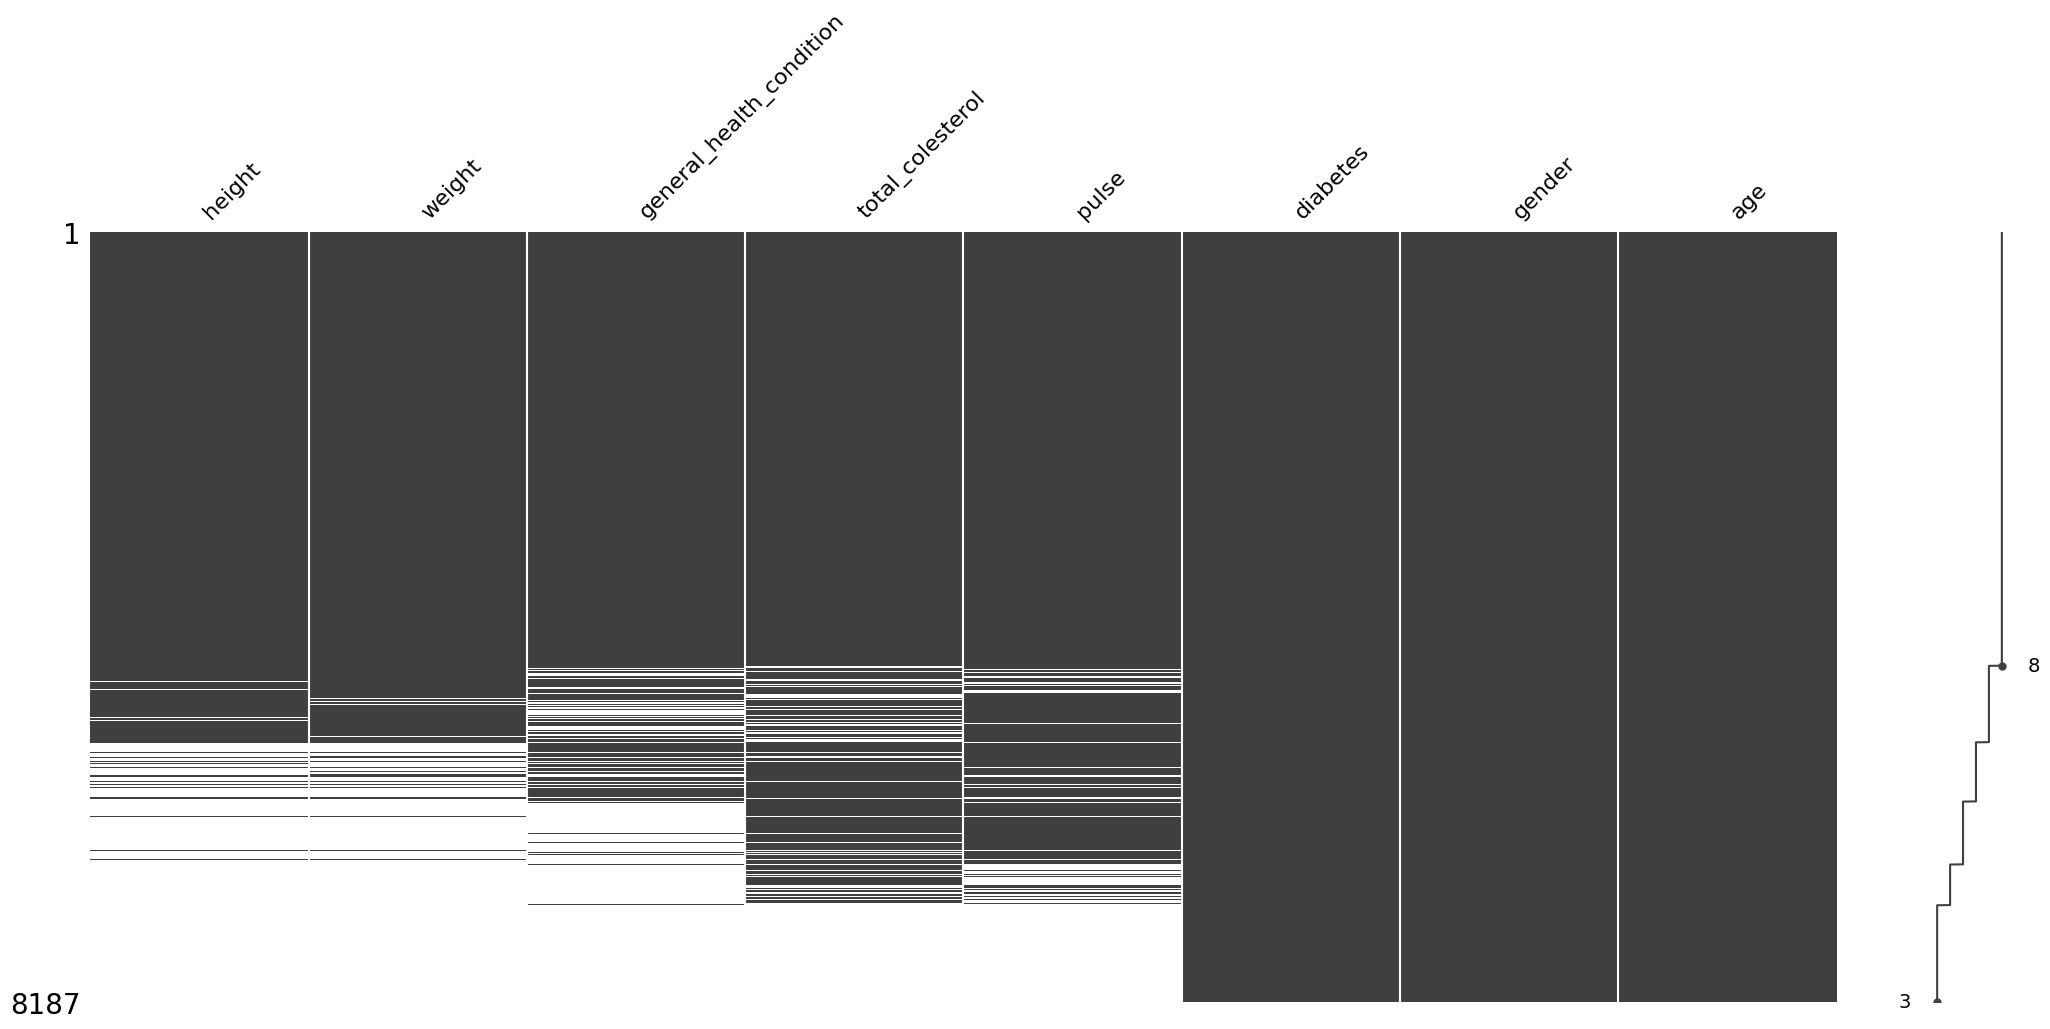

In [24]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

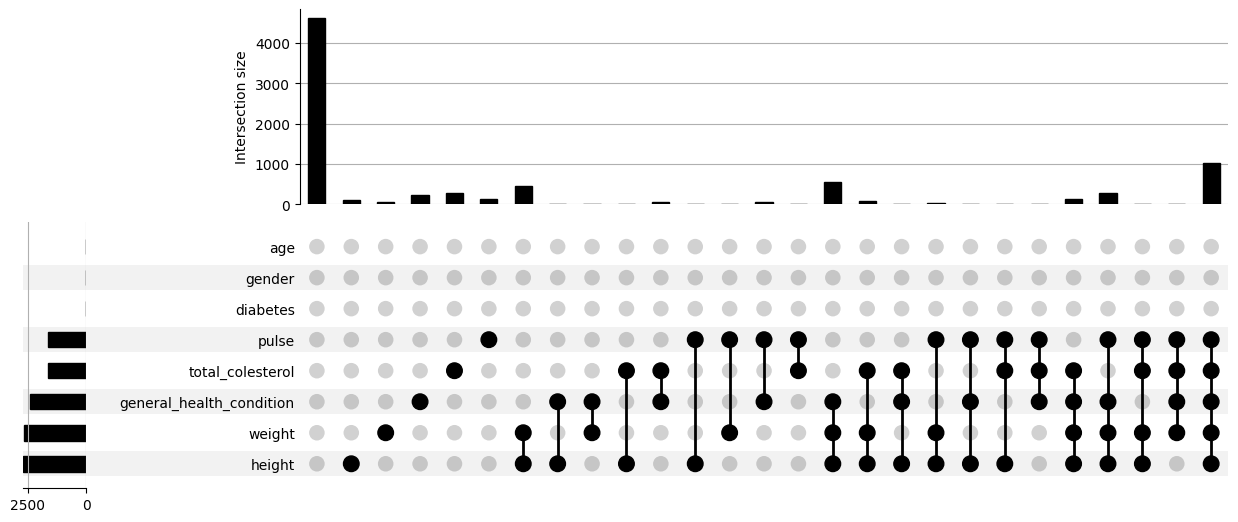

In [26]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<Axes: >

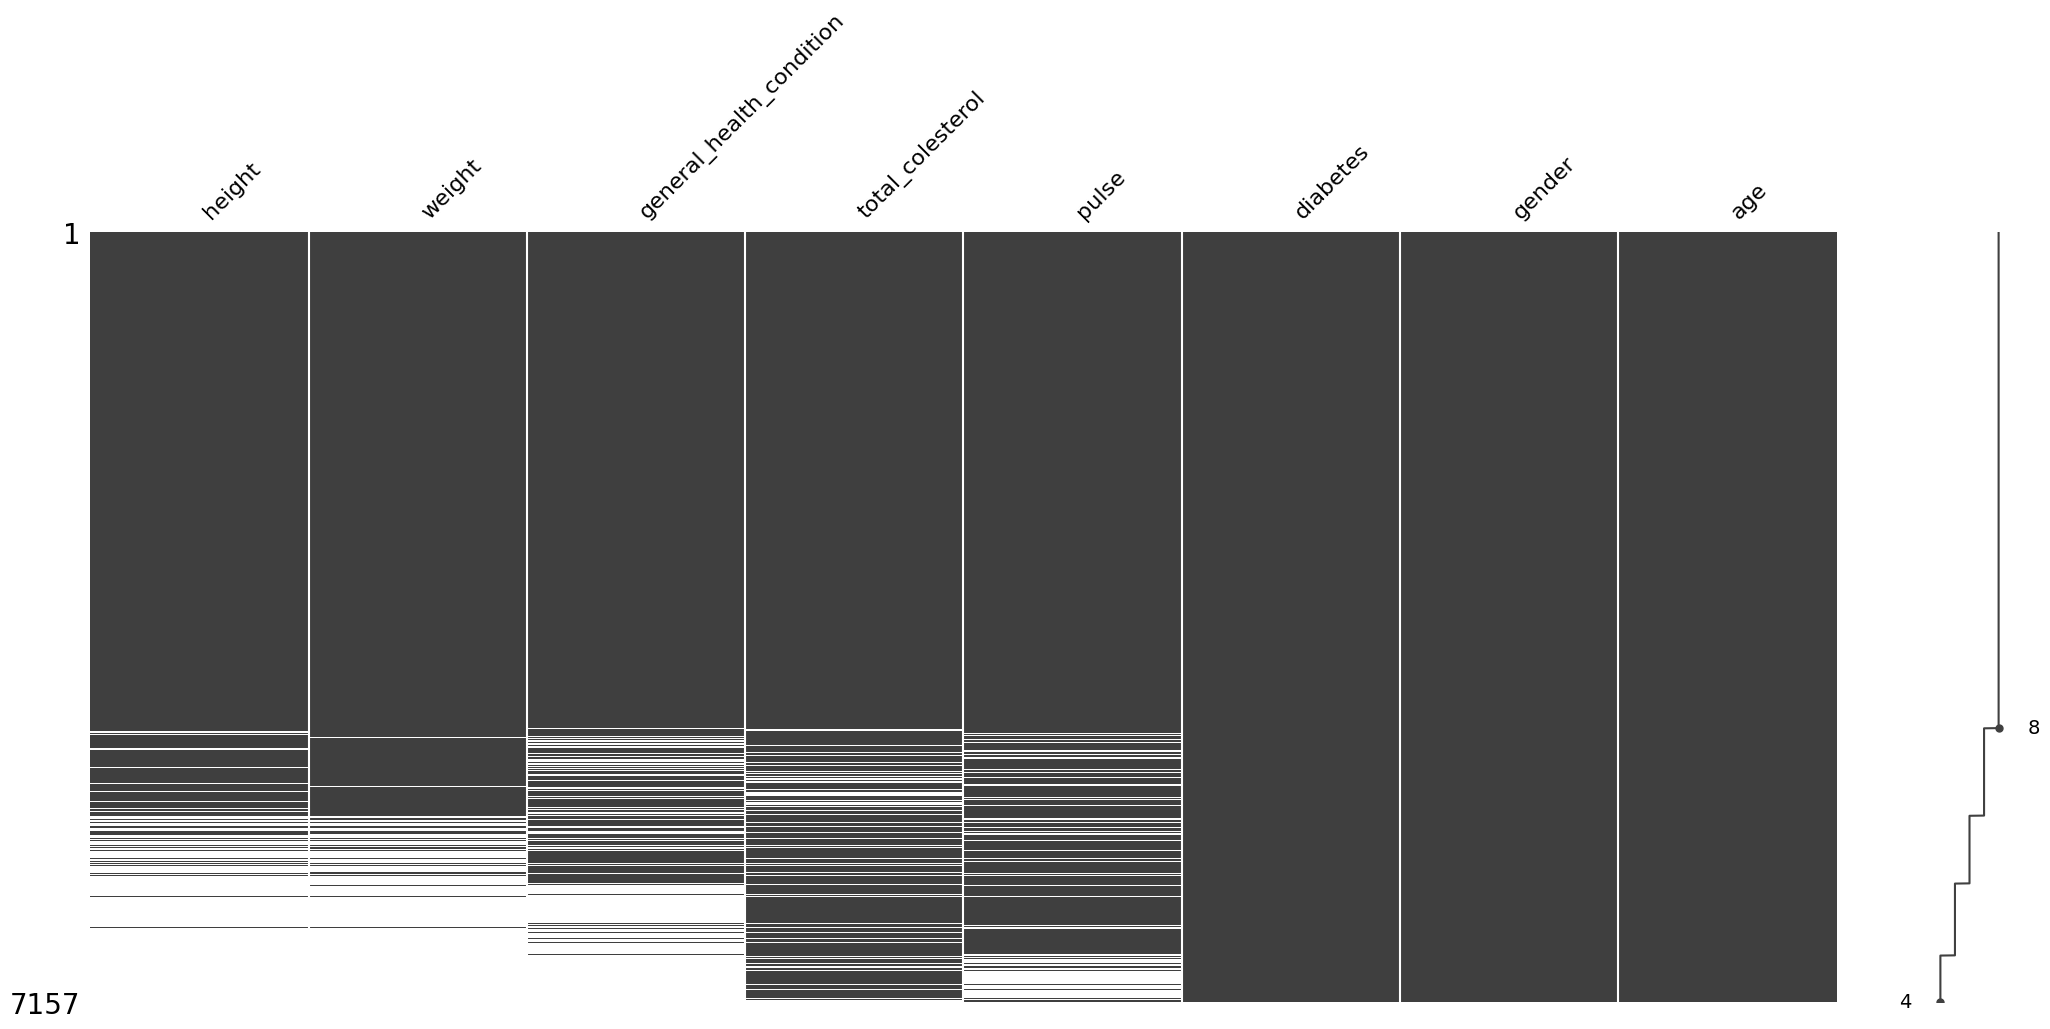

In [28]:
(
    nhanes_df
    .dropna(
        subset= ["pulse","total_colesterol","general_health_condition","weight","height"],
        how="all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")

)

## Eliminar valores faltantes

In [29]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset= ["pulse","total_colesterol","general_health_condition","weight","height"],
        how="all"
    )
    .missing.sort_variables_by_missingness()
)
nhanes_df.shape

(7157, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>